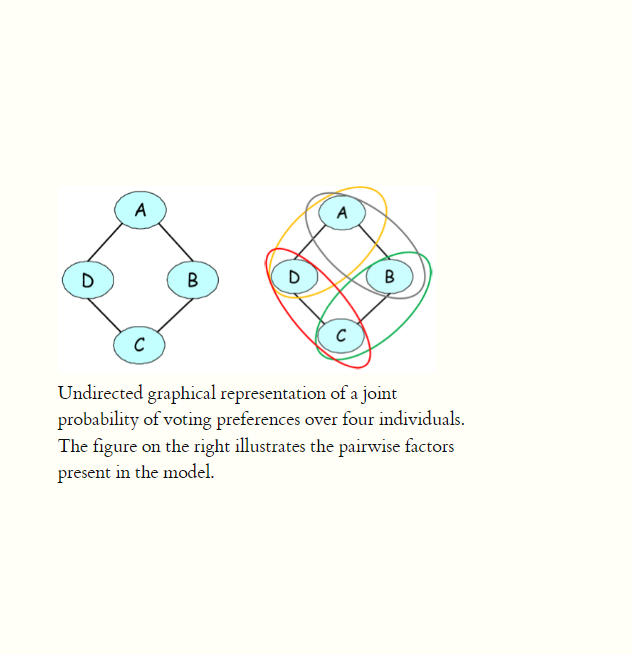

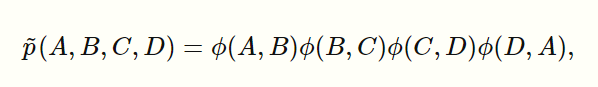

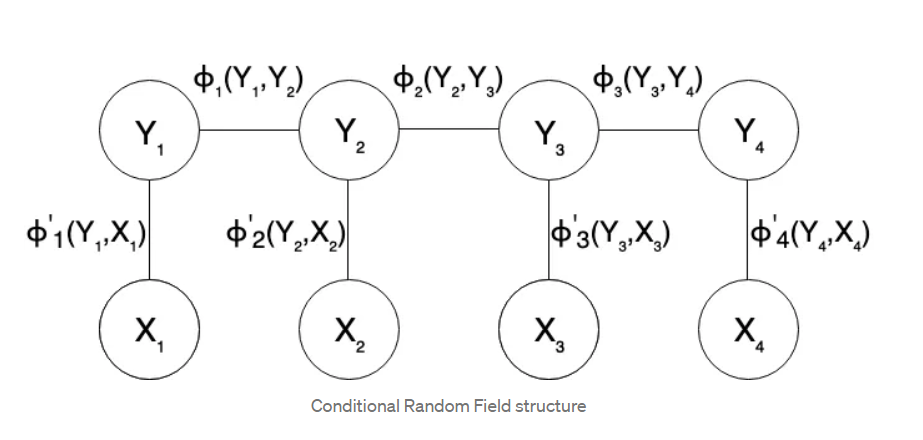

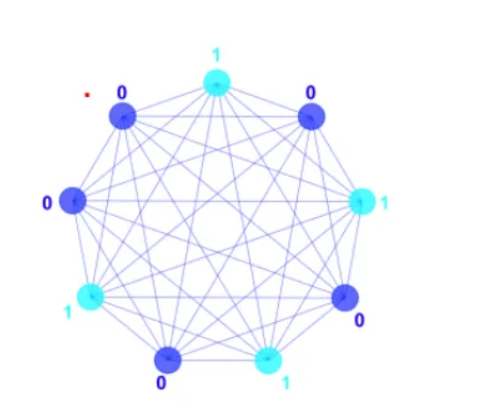

A Markov Random Field is a graph whose nodes model random variables, and whose edges model desired local influences among pairs of them. Local influences propagate globally, leveraging the connectivity of the graph.

In [ ]:
import numpy as np
from skimage import data, io, filters
from matplotlib import pyplot as plt
from PIL import Image
from skimage.transform import resize
import random
%matplotlib inline

Dimensions of the eagle image are: (2019, 1826)


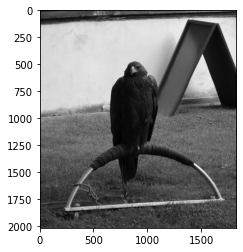

In [ ]:
eagle_img = data.eagle()
print("Dimensions of the eagle image are:", eagle_img.shape)
plt.imshow(eagle_img, cmap='gray')

Image Binarization is the conversion of document image into bi-level document image. Image pixels are separated into dual collection of pixels, i.e. black and white. The main goal of image binarization is the segmentation of document into foreground text and background.

In [ ]:
def binarize_img(img):
    bin_img = img / 255.

    bin_img.flags.writeable = True
    bin_img[bin_img < 0.5] = 0
    bin_img[bin_img >= 0.5] = 1

    return bin_img

dimensions:  (2019, 1826)


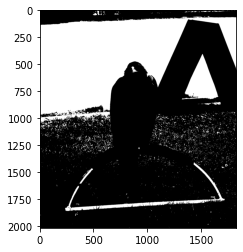

In [ ]:
bin_eagle = binarize_img(eagle_img)
print("dimensions: ", bin_eagle.shape)
plt.imshow(bin_eagle, cmap='gray')

Adding noise to an image means applying a grainy filter effect to a photo to make it look like the electronic noise that appears on old television sets. People often like to add noise to photos to give them a nostalgic film look.

In [ ]:
def add_noise(original_img, thresh=0.01):

    N, M = original_img.shape
    noisy_img = original_img.copy()
    noise = np.random.rand(N, M)
    noise[noise < 1-thresh] = 0
    noise[noise >= 1-thresh] = 1
    noisy_img = (noisy_img + noise) % 2
    
    return noisy_img

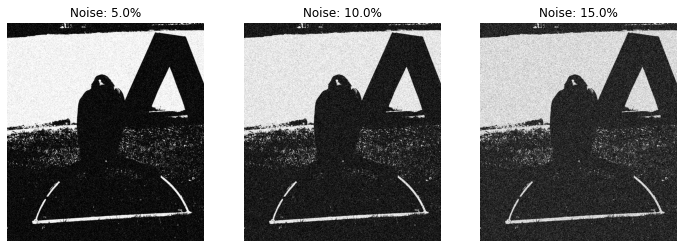

In [ ]:
fig = plt.figure(figsize=(12, 6))

for i in range(1, 4):
  thresh = i/20
  noisy_img = add_noise(bin_eagle, thresh)
  plt.subplot(1, 3, i)
  plt.title(f'Noise: {thresh*100}%')
  plt.axis('off')
  plt.imshow(noisy_img, cmap='gray')
plt.show()

In [ ]:
def get_neighbours(i, j, M, N):
    neighbours = []
    if i > 0:
        neighbours.append([i-1, j])
    if i < M-1:
        neighbours.append([i+1, j])
    if j > 0:
        neighbours.append([i, j-1])
    if j < N-1:
        neighbours.append([i, j+1])

    return neighbours

In [ ]:
def enrg(new, old, y, neighbours):
    lmda = -100
    return (new - old)**2 + lmda * np.sum((new - y[neighbour[0], neighbour[1]])**2 for neighbour in neighbours)

In [ ]:
def diff(y, y_old):
    diff = abs(y - y_old) / 2
    return (100.0 * np.sum(diff)) / np.size(y)

Denoising is the process of removing or reducing the noise or artifacts from the image. Denoising makes the image more clear and enables us to see finer details in the image clearly. It does not change the brightness or contrast of the image directly, but due to the removal of artifacts, the final image may look brighter.

In [ ]:
def denoise(noisy_img):
    M, N = noisy_img.shape
    y = noisy_img.copy()
    maxiter = 10*M*N

    for iter in range(maxiter):
        i = np.random.randint(M)
        j = np.random.randint(N)
        neighbours = get_neighbours(i, j, M, N)

        enrg_1 = enrg(1, y[i, j], y, neighbours)
        enrg_0 = enrg(0, y[i, j], y, neighbours)

        if enrg_1 > enrg_0:
            y[i, j] = 1
        else:
            y[i, j] = 0
        
        if iter % 1000000 == 0:
            print (f'Completed {iter} iterations out of {maxiter}. Denoized pixels are: {diff(y, noisy_img)}%')

    return y

In [ ]:
fig = plt.figure(figsize=(8, 20))

for i in range(1, 5 + 1):
  thresh = i/20
  print(f"Denoising for noise level: {thresh*100}")

  noisy_img = add_noise(bin_eagle, thresh)
  denoised_img = denoise(noisy_img)

  plt.subplot(5, 2, 2*i-1)
  plt.title(f'Noise: {thresh*100}%')
  plt.axis('off')
  plt.imshow(noisy_img, cmap='gray')

  plt.subplot(5, 2, 2*i)
  plt.title(f'Denoised image ({diff(noisy_img, denoised_img)}%)')
  plt.axis('off')
  plt.imshow(denoised_img, cmap='gray')

print()
plt.show()

Denoising for noise level: 5.0
Completed 0 iterations out of 36866940. Denoized pixels are: 0.0%


<ipython-input-11-9ba646691f8f>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return (new - old)**2 + lmda * np.sum((new - y[neighbour[0], neighbour[1]])**2 for neighbour in neighbours)


Completed 1000000 iterations out of 36866940. Denoized pixels are: 0.8442930169957149%


KeyboardInterrupt: ignored

<Figure size 576x1440 with 0 Axes>

#Problem Statement 2: For the sample code hopfield.m supplied in the lab-work folder, find out the amount of error (in bits) tolerable for each of the stored patterns.

#Hopfield Network

* A Hopfield network is a type of recurrent neural network (RNN) that is used for pattern recognition and associative memory.

* A Hopfield network consists of a set of binary neurons that are fully interconnected. The connections between the neurons are weighted.

* The main idea behind a Hopfield network is that it can learn to associate a set of patterns with each other, so that when one pattern is presented to the network, it can retrieve the associated patterns.

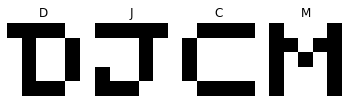

In [ ]:
# Patterns to store

D = np.array([-1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1]).reshape(5,5)
J = np.array([-1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1]).reshape(5,5)
C = np.array([1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1]).reshape(5,5)
M = np.array([-1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1]).reshape(5,5)

X = np.array([D, J, C, M])

letters = ['D', 'J', 'C', 'M']

fig = plt.figure(figsize=(6, 6))

for idx, letter in enumerate(X):
    plt.subplot(1, 4, idx+1)
    plt.title(letters[idx])
    plt.axis('off')
    plt.imshow(letter, cmap='gray')
plt.show()

* Here, n is the number of patterns in the input data X, and m is the total number of neurons in the network, which is the product of the height and width of each pattern in X.

* This loop iterates over the patterns in the input data X and applies Hebb's rule to each pattern. The outer product of each pattern with itself is calculated, and then added to the weight matrix W. The outer product of a vector with itself creates a matrix whose elements are the products of the corresponding elements of the original vector.

* Formula for calculating the weights using the hebb's rule: $$w_{ij} = \frac{1}{m}\sum_{\mu=1}^n x_i^\mu x_j^\mu$$

In [ ]:
# Learn the weights according to Hebb's rule

n = X.shape[0]
m = X.shape[1] * X.shape[2]

W = np.zeros((m,m));
for i in range(n):
	W += X[i, :].reshape(-1, 1) @  X[i, :].reshape(1, -1)

np.fill_diagonal(W, 0)

W /= n

* This Python function, add_error(num_errors=1), takes an integer argument num_errors (default value 1) and returns a tuple containing two elements: a randomly chosen image from the dataset X and a copy of that image with a specified number of random pixel errors.

In [ ]:
def add_error(num_errors=1):
    chosen_letter = random.choice(X)
    letter_with_err = chosen_letter.copy()
    errors = []
    while num_errors:
        i = np.random.randint(5)
        j = np.random.randint(5)

        if (i, j) not in errors:
            errors.append((i, j))
            letter_with_err[i, j] = -letter_with_err[i, j]
            num_errors -= 1

    return chosen_letter, letter_with_err

* Overall, the above function is used to introduce a specified number of errors into a randomly chosen image from the list. It does so by flipping the sign of the pixel values at randomly selected coordinates.

* The code below generates 15 images for each letter with increasing numbers of errors, and applies Hebb's rule to try to correct the errors. The resulting images are displayed in a 15x3 grid, with each row corresponding to a different letter, and each column showing a different stage of the process.

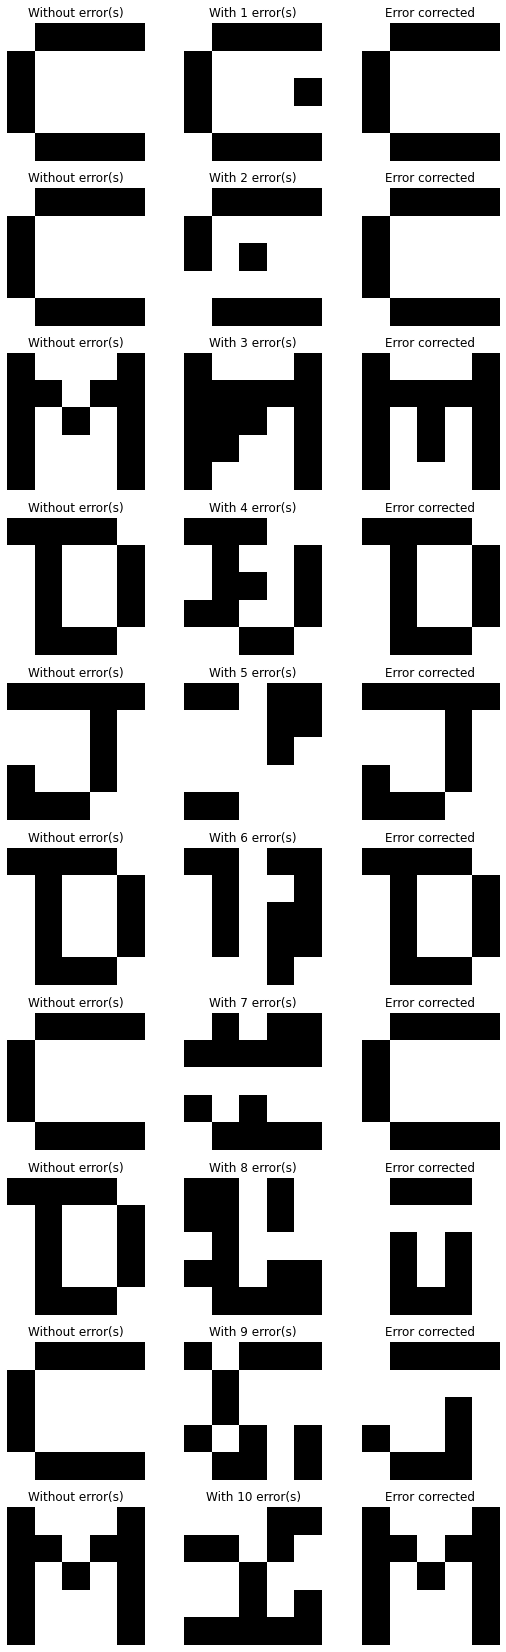

In [ ]:
# Removing errors

fig = plt.figure(figsize=(9, 45))

for i in range(1, 10 + 1):
    chosen_letter, letter_with_err = add_error(i)

    y = letter_with_err.reshape(-1)

    last_erry = 0
    erry = 26
    while erry != last_erry:
        last_erry = erry
        yp = np.sign(W @ y)
        erry = np.linalg.norm(yp - y)
        y = yp
    
    plt.subplot(15, 3, 3*(i-1)+1)
    plt.title('Without error(s)')
    plt.axis('off')
    plt.imshow(chosen_letter, cmap='gray')
    plt.subplot(15, 3, 3*(i-1)+2)
    plt.title(f'With {i} error(s)')
    plt.axis('off')
    plt.imshow(letter_with_err, cmap='gray')
    plt.subplot(15, 3, 3*(i-1)+3)
    plt.title('Error corrected')
    plt.axis('off')
    plt.imshow(y.reshape(5,5), cmap='gray')
plt.show()

* The error tolerable for each pattern in the Hopfield network can be determined by the number of errors that can be introduced to the pattern and still be corrected by the network. In the above implementation, the loop is adding up to 10 errors to each of the stored patterns and attempting to correct them using the Hopfield network.

* By analyzing the output of the code, we can see that all of the stored patterns are able to correct up to 5 errors. However, when the number of errors is increased to 6 or more, some of the stored patterns are not able to be correctly identified and converge to a different pattern, indicating a spurious attractor.

* Therefore, in this specific implementation of the Hopfield network, the error tolerable for each pattern is up to 5 errors.


#TSP using a hopfield network

What is TSP ? 



*  It is Optimization Problem, where no of cities and distance b/w each other is given.
*  Find: the shortest route that visit each city once and returns to starting city



What is Hopfield Network? 



*   It is a Neural Network which is used in Associative memory . Every Neuron's feedback is connected to other excepts itself.
*   An auto assciative fully interconnected and symmetrically weighted network.


*   It has two types : discrete and continous
*  The neuron consist two output , the output of one is feedback to other not to itself.





How to Going to solve TSP using Hopfield Network? 





1.  Represent each city as a node in the network, and connect each pair of cities with a weighted edge that represents the distance between them. For example, if there are four cities, the network would consist of four nodes and six edges.
2.  Define an energy function that corresponds to the TSP objective function (i.e., the total distance of the tour). The energy function should have a minimum when the network is in a state that corresponds to a valid tour.


3.  Use the Hopfield network dynamics to find the state of the network that corresponds to the minimum energy. This can be done by iteratively updating the state of each node until the network reaches a stable state. 
4. Extract the tour from the final state of the network. This can be done by starting at any node and following the edge with the lowest weight to the next node, until all nodes have been visited.





In [ ]:
# Number of cities
N = 10

city_x = np.random.rand((10))
city_y = np.random.rand((10))

print('The co-ordinates of the 10 cities are:')
for city in zip(city_x, city_y):
    print(city)

The co-ordinates of the 10 cities are:
(0.46262373189348194, 0.6301736823950191)
(0.19679932748972118, 0.9753640370925706)
(0.6870376972718123, 0.015731915289230458)
(0.32187239532600787, 0.8080900432716861)
(0.5551145738648097, 0.42181097051766836)
(0.12303465486298892, 0.7427986069668052)
(0.3068661982624469, 0.3455276580697315)
(0.05981872956992229, 0.7094613539647343)
(0.007794277853469311, 0.7507188848459038)
(0.9419440286993108, 0.10524101667852792)


Text(0.5, 1.0, 'Map of cities')

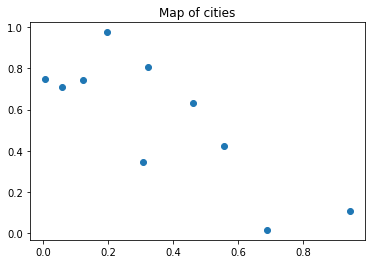

In [ ]:
plt.plot(city_x, city_y, 'o')
plt.title('Map of cities')

In [ ]:
d = np.zeros((N,N))
# Calculate distance matrix
for i in range(N):
    for j in range(N):
        d[i, j] = np.sqrt((city_x[i] - city_x[j])**2 + (city_y[i] - city_y[j])**2)

In [ ]:
# Set parameters for network energy function
A = 500
B = 500
C = 1000
D = 500
alpha = 0.0001

In [ ]:
# x-v-value of each node, y-u-input potential, u0-gamma
def hopfield():
    u0 = 0.02
    toend = 0
    udao = np.zeros((N, N))
    ctr = 0
    while toend == 0:
        ctr += 1
        # U initialization
        v = np.random.rand(N,N)
        u = np.ones([N, N])*(-u0*np.log(N-1)/2)

        u += u*0.91
        for _ in range(1000):
            for vx in range(N):
                for vi in range(N):
                    j1, j2, j3, j4 = 0, 0, 0, 0

                    # derivative 1 (sum over columns j!=vi)
                    for j in range(N):
                        if j != vi:
                            j1 += v[vx, j]
                    j1 *= -A

                    # derivative 2 (sum over rows y!=x)
                    for y in range(N):
                        if y != vx:
                            j2 += v[y, vi]
                    j2 *= -B

                    # derivative 3 (overall sum)
                    j3 = np.sum(v)
                    j3 = -C*(j3-N)

                    # derivative 4
                    for y in range(N):
                        if y != vx:
                            if vi == 0:
                                j4 += d[vx, y]*(v[y, vi+1]+v[y, N-1])
                            elif vi == N-1:
                                j4 += d[vx, y]*(v[y, vi-1]+v[y, 0])
                            else:
                                j4 += d[vx, y]*(v[y, vi+1]+v[y, vi-1])
                    j4 *= -D
                    udao[vx, vi] = -u[vx, vi]+j1+j2+j3+j4

            # update status and derivatives
            u = u + alpha*udao

            # calculate node value from input potential u
            v = (1+np.tanh(u/u0)) / 2

            # threshold
            for vx in range(N):
                for vi in range(N):
                    if(v[vx, vi] < 0.7):
                        v[vx, vi] = 0
                    if(v[vx, vi] >= 0.7):
                        v[vx, vi]=1

        # testing whether solution is legal
        t1, t2, t3 = 0, 0, 0

        # require total of N-nodes with 1 value
        t1=0;
        for vx in range(N):
            for vi in range(N):
                t1+=v[vx, vi]

        # allow only one node in each row equal 1
        t2=0
        for x in range(N):
            for i in range(N-1):
                for j in range(i+1, N):
                    t2+=np.multiply(v[x, i], v[x, j])

        # allow only one node in each column equal 1
        t3=0
        for i in range(N):
            for x in range(N-1):
                for y in range(x+1, N):
                    t3+=np.multiply(v[x, i], v[y, i])

        # stop the loop after getting the valid solution
        if t1 == N and t2 == 0 and t3 == 0:
            toend = 1
        else:
            toend = 0

    return(v, ctr)


In [ ]:
def total_distance(v):
    city_x_final = np.zeros((N+1))
    city_y_final = np.zeros((N+1))

    for j in range(N):
        for i in range(N):
            if v[i,j] == 1:
                city_x_final[j] = city_x[i]
                city_y_final[j] = city_y[i]

    city_x_final[N] = city_x_final[0]
    city_y_final[N] = city_y_final[0]

    # calculate the total distance
    td = 0
    for i in range(N-1):
        td += np.sqrt((city_x_final[i] - city_x_final[i+1])**2
                    + (city_y_final[i] - city_y_final[i+1])**2)
    td += np.sqrt((city_x_final[N-1] - city_x_final[0])**2
                + (city_y_final[N-1] - city_y_final[0])**2)
    
    return(td, city_x_final, city_y_final)

In [ ]:
v = np.zeros([N,N])

ct = 0

min_dist = 20
best_path = None

for i in range(5):
    v, steps = hopfield()
    td, _, _ = total_distance(v)
    print(f"Epoch {i}: Ran for {steps} steps, total distance {td}")
    if td < min_dist:
        min_dist = td
        best_path = v
print(min_dist)
print(best_path)

Epoch 0: Ran for 28 steps, total distance 3.0404871885524503
Epoch 1: Ran for 10 steps, total distance 3.3029163023986072
Epoch 2: Ran for 69 steps, total distance 2.822454542658017
Epoch 3: Ran for 181 steps, total distance 3.2610563023829306
Epoch 4: Ran for 54 steps, total distance 3.514105051864476
2.822454542658017
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
def get_route(v):
    route = ""
    for j in range(v.shape[1]):
        route += str(np.argmax(v[:, j])) + ' -> '
    return (route + str(np.argmax(v[:, 0])))

In [ ]:
print(get_route(best_path))

0 -> 4 -> 9 -> 2 -> 6 -> 8 -> 7 -> 5 -> 1 -> 3 -> 0


In [ ]:
def get_route_indices(v):
    indices = []
    for j in range(v.shape[1]):
        indices.append(np.argmax(v[:, j]))
    indices.append(np.argmax(v[:, 0]))
    return indices

In [ ]:
indices = get_route_indices(best_path)
print(indices)

[0, 4, 9, 2, 6, 8, 7, 5, 1, 3, 0]


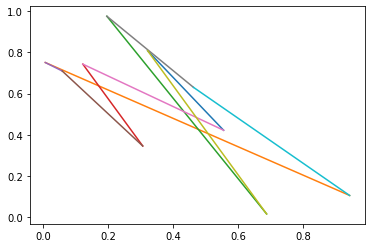

In [ ]:
for i in indices[1:]:
    plt.plot([city_x[i], city_x[i-1]], [city_y[i], city_y[i-1]], '-')
plt.show()